In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import zipfile
import os


# Define the path to the zip file and the extraction directory
zip_file_path = "/content/drive/MyDrive/archive (2).zip"
extract_dir = "/content"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/archive (2).zip' to '/content'


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [24]:
train='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [25]:
size=224

In [26]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(
    train,
    batch_size=164,
    target_size=(size, size),
    subset="training",
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)


Found 63282 images belonging to 38 classes.


In [27]:
{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Tomato___Late_blight': 30,
 'Tomato___Leaf_Mold': 31,
 'Tomato___Septoria_leaf_spot': 32,
 'Tomato___Spider_mites Two-spotted_spider_mite': 33,
 'Tomato___Target_Spot': 34,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35,
 'Tomato___Tomato_mosaic_virus': 36,
 'Tomato___healthy': 37}


{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

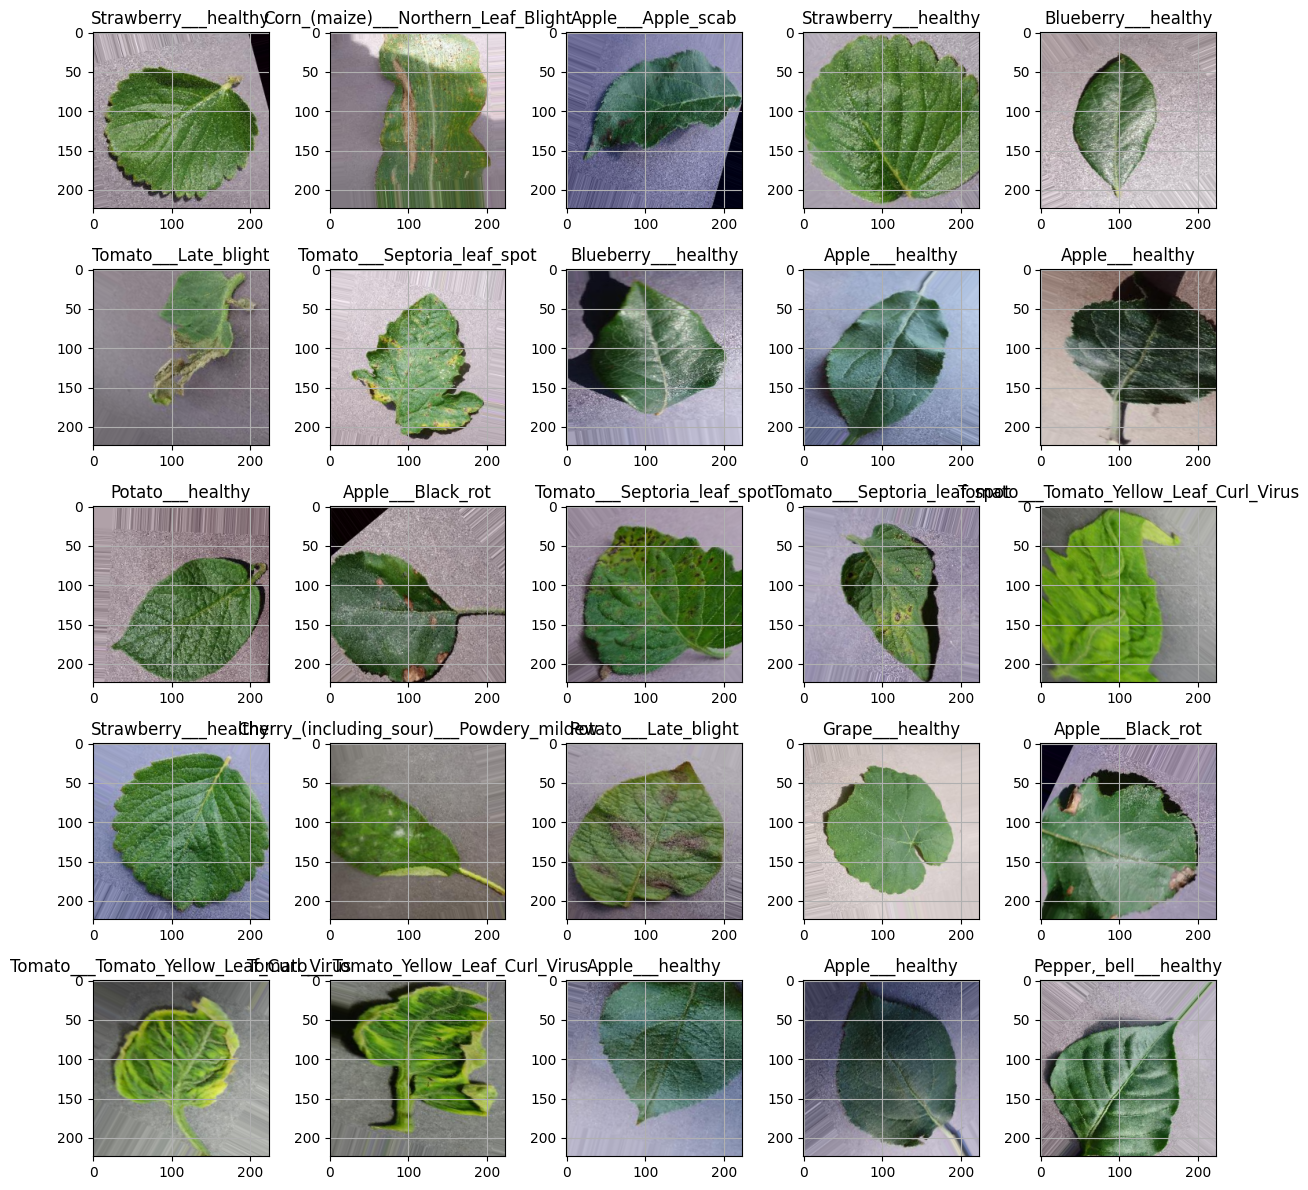

In [28]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(12, 12))

for X_batch, y_batch in train_generator:
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]], fontsize=12)
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    break





In [29]:
valid='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [30]:
import tensorflow as tf
from tensorflow.data import AUTOTUNE

# Use ImageDataGenerator correctly spelled
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
).flow_from_directory(
    valid,
    batch_size=164,
    target_size=(224, 224),
    subset='validation',
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Wrap with tf.data.Dataset for performance improvements
valid_dataset = tf.data.Dataset.from_generator(
    lambda: valid_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 224, 224, 3], [None, None])  # Adjust shape based on num classes
)

# Prefetching to improve pipeline efficiency
valid_dataset = valid_dataset.prefetch(buffer_size=AUTOTUNE)

Found 1742 images belonging to 38 classes.


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


In [31]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [32]:
import tensorflow as tf
from tensorflow.data import AUTOTUNE

# Original test generator
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Wrap the generator in a tf.data.Dataset for performance improvements
test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 224, 224, 3], [None, None])  # Adjust based on number of classes
)

# Optimize pipeline
test_dataset = test_dataset.prefetch(AUTOTUNE)

Found 17572 images belonging to 38 classes.


In [33]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [34]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Weight regularization
REG = regularizers.l2(1e-4)
INIT = 'he_normal'

model = keras.models.Sequential()

# Conv Block 1
model.add(layers.Conv2D(32, kernel_size=7, strides=1,
                        padding="same", activation="relu",
                        kernel_initializer=INIT,
                        kernel_regularizer=REG,
                        name="Conv1", input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization(name="BN1"))
model.add(layers.MaxPooling2D(pool_size=2, name="Pool1"))

# Conv Block 2
model.add(layers.Conv2D(64, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        kernel_initializer=INIT,
                        kernel_regularizer=REG,
                        name="Conv2"))
model.add(layers.BatchNormalization(name="BN2"))
model.add(layers.MaxPooling2D(pool_size=2, name="Pool2"))

# Conv Block 3
model.add(layers.Conv2D(128, kernel_size=3, strides=1,
                        padding="same", activation="relu",
                        kernel_initializer=INIT,
                        kernel_regularizer=REG,
                        name="Conv3"))
model.add(layers.BatchNormalization(name="BN3"))

# Conv Block 4
model.add(layers.Conv2D(256, kernel_size=3, strides=1,
                        padding="same", activation="relu",
                        kernel_initializer=INIT,
                        kernel_regularizer=REG,
                        name="Conv4"))
model.add(layers.BatchNormalization(name="BN4"))
model.add(layers.MaxPooling2D(pool_size=2, name="Pool3"))

# Flatten and Dense Layers
model.add(layers.Flatten(name="Flatten1"))
model.add(layers.Dense(128, activation="relu",
                       kernel_initializer=INIT,
                       kernel_regularizer=REG,
                       name="Dense1"))
model.add(layers.BatchNormalization(name="BN5"))
model.add(layers.Dropout(0.5, name="Dropout1"))

model.add(layers.Dense(64, activation="relu",
                       kernel_initializer=INIT,
                       kernel_regularizer=REG,
                       name="Dense2"))
model.add(layers.BatchNormalization(name="BN6"))
model.add(layers.Dropout(0.5, name="Dropout2"))

# Output Layer
model.add(layers.Dense(38, activation="softmax", name="Output"))

# Summary
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN1 (BatchNormalization)        │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN2 (BatchNormalization)        │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN3 (BatchNormalization)        │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN4 (BatchNormalization)        │ (None, 56, 56, 256)    │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN5 (BatchNormalization)        │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout1 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BN6 (BatchNormalization)        │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout2 (Dropout)              │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,128,678 (99.67 MB)

 Trainable params: 26,127,334 (99.67 MB)

 Non-trainable params: 1,344 (5.25 KB)

None


In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
model_ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, min_lr=0.000001)

callbacks = [early_stopping, model_checkpoint, model_ReduceLROnPlateau]

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', 'precision', 'recall'])

In [37]:
history = model.fit(train_generator, epochs=11, validation_data=valid_generator, callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/11
386/386 ━━━━━━━━━━━━━━━━━━━━ 967s 2s/step - accuracy: 0.2349 - loss: 3.2201 - precision: 0.5435 - recall: 0.0794 - val_accuracy: 0.4828 - val_loss: 2.0794 - val_precision: 0.7815 - val_recall: 0.3450 - learning_rate: 0.0010
Epoch 2/11
386/386 ━━━━━━━━━━━━━━━━━━━━ 880s 2s/step - accuracy: 0.6089 - loss: 1.6337 - precision: 0.8114 - recall: 0.3983 - val_accuracy: 0.6883 - val_loss: 1.3261 - val_precision: 0.7971 - val_recall: 0.5752 - learning_rate: 0.0010
Epoch 3/11
386/386 ━━━━━━━━━━━━━━━━━━━━ 851s 2s/step - accuracy: 0.7480 - loss: 1.1835 - precision: 0.8597 - recall: 0.6267 - val_accuracy: 0.7658 - val_loss: 1.1234 - val_precision: 0.8247 - val_recall: 0.7181 - learning_rate: 0.0010
Epoch 4/11
386/386 ━━━━━━━━━━━━━━━━━━━━ 936s 2s/step - accuracy: 0.8269 - loss: 0.9821 - precision: 0.8934 - recall: 0.7596 - val_accuracy: 0.7945 - val_loss: 1.1444 - val_precision: 0.8483 - val_recall: 0.7543 - learning_rate: 0.0010
Epoch 5/11
386/386 ━━━━━━━━━━━━━━━━━━━━ 973s 2s/step - accur

In [38]:
import seaborn as sns
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

precision = history.history['precision']
val_precision = history.history['val_precision']

recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

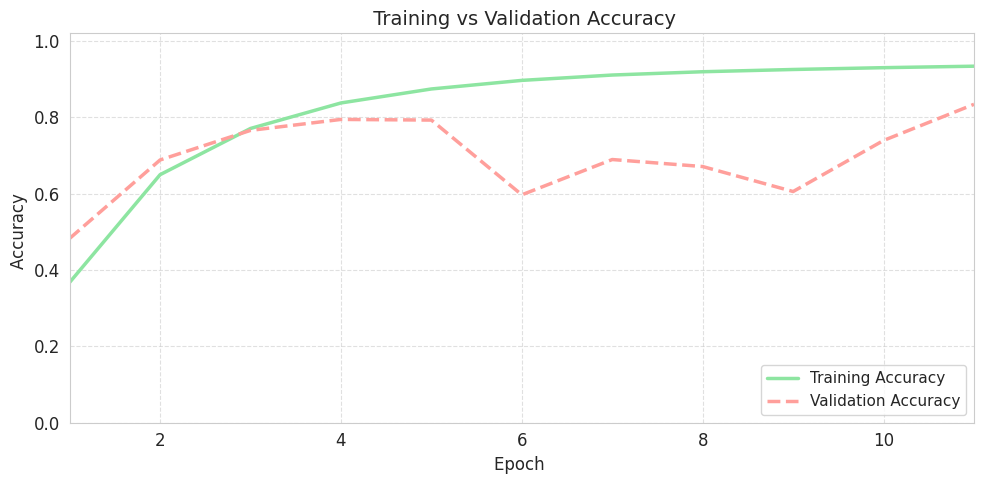

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, color=sns.color_palette("pastel")[2], linestyle='-', linewidth=2.5, label='Training Accuracy')
plt.plot(epochs, val_acc, color=sns.color_palette("pastel")[3], linestyle='--', linewidth=2.5, label='Validation Accuracy')

# Title and labels
plt.title(' Training vs Validation Accuracy', fontsize=14)
plt.xlabel('Epoch ', fontsize=12)
plt.ylabel('Accuracy ', fontsize=12)

# Axis limits and legend
plt.ylim(0, 1.02)
plt.xlim(1, len(epochs))
plt.legend(loc='lower right', fontsize=11)

# Show grid and clean layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [40]:
model_evaluate = model.evaluate(test_generator)
print('Loss: ', model_evaluate[0])
print('Accuracy: ', model_evaluate[1])
print('Precision: ', model_evaluate[2])
print('Recall: ', model_evaluate[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 396ms/step - accuracy: 0.8353 - loss: 0.9126 - precision: 0.8799 - recall: 0.7884
Loss:  1.0783601999282837
Accuracy:  0.7914864420890808
Precision:  0.8478147387504578
Recall:  0.7396426200866699


In [41]:
model.save('PDDS.keras')